In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# Preparing data
data = np.genfromtxt("l3_data.csv", delimiter=",")

def split_data(data):
    _, columns_count = data.shape
    return data[:, 0:columns_count - 1], data[:, columns_count - 1]

def normalize(data):
    examples_count, columns_count = data.shape
    for i in range(columns_count - 1):
        feature = data[:, i]
        min = np.min(feature)
        max = np.max(feature)
        data[:, i] = (feature - min) / (max - min)
    return data

In [115]:
# Distance function
def distance(feature_test, feature):
    result = np.sqrt(np.sum(np.power(feature_test - feature, 2)))
    return result

In [126]:
# Find nearest
def nearest(features_test, features, y, k = 5):
    examples_count, _ = features.shape
    feature_test_count, _ = features_test.shape
    labels = np.zeros((1, feature_test_count))
    for i in range(feature_test_count):
        row = features_test[i:]
        distances = np.array([distance(row, features[i]) for i in range(examples_count)])
        nearest_labels = y[np.argsort(distances)[:k]]
        label = np.argmax(np.bincount(nearest_labels.astype('int64')))
        labels[0, i] = label
    return labels

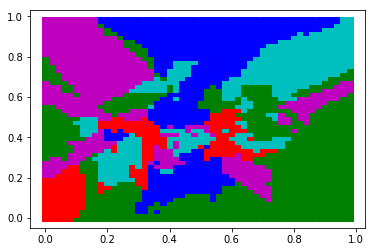

In [134]:
def plot_area(pts):
    for (x, y, color) in pts:
        plt.plot(x, y, 's', color = color)  
    plt.show()

def pts(features, y):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    xs = np.arange(0, 1, 0.02)
    ys = np.arange(0, 1, 0.02)
    pts = []
    for i in xs:
        for j in ys:
            label = nearest(np.array([[i, j]]), features, y, k = 7)[0, 0]
            pts.append((i, j, colors[label.astype('int64')]))
    return pts
    

features, y = split_data(normalize(data))

plot_area(pts(features, y))